In [1]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from MDP import *
from plot import get_traj_frames, plot

In [3]:
def visualise_policy(policy, env, move_map):
    map = []
    for i in range(env.num_rows):
        moves = []
        for j in range(env.num_cols):
                if env.data[i][j] == 'H':
                    moves.append('O')
                elif env.data[i][j] == 'G':
                    moves.append('X')
                else:
                    moves.append(move_map[policy[env.state_encoding[(i,j)]]])
        map.append(moves)
    file = ''
    for i in map:
        file += ' '.join(i) + '\n'
    print(file)
    return file

def animate_policy(policy):
    plcy = policy.reshape((small_environment.num_rows,small_environment.num_cols))
    for i in range(4):
        for j in range(4):
            if  small_environment.data[i][j] == 'G' or small_environment.data[i][j] == 'H':
                plcy[i][j] = -1
    frames = get_traj_frames(small_environment.data, plcy)
    plot(frames,cell_size=15,frame_delay=1)        

# Part - A
- Value Iteration Vanilla
- Row-major
- Prioritized
- Policy
- Mixture

To report:
- Wall time for convergence and number of iterations
- Plot the estimated value of start for every iteration (for each map and four line plots)
- Heat-map

In [4]:
living_reward = 0
hole_reward = 0
goal_reward = 1
p = 0.8
move_list = [0,1,2,3]
move_move_map = {0:[1,2,3],1:[0,2,3],2:[0,1,3],3:[0,1,2]}
tol = 1e-9
move_map = {0: "\u25B2", 1: "\u25BC", 2: "\u25C4", 3: "\u25BA"}
# 0 - up , 1 - down , 2 - left , 3 - right

In [11]:
small_environment = environment('small_map.csv', move_list,move_move_map, living_reward = living_reward, hole_reward = hole_reward, goal_reward = goal_reward)

In [13]:
small_environment.trans_map[14]

defaultdict(<function MDP.environment.__init__.<locals>.<lambda>.<locals>.<lambda>()>,
            {0: defaultdict(<function MDP.environment.__init__.<locals>.<lambda>.<locals>.<lambda>.<locals>.<lambda>()>,
                         {10: 0.8,
                          14: 0.06666666666666665,
                          13: 0.06666666666666665,
                          15: 0.06666666666666665}),
             1: defaultdict(<function MDP.environment.__init__.<locals>.<lambda>.<locals>.<lambda>.<locals>.<lambda>()>,
                         {14: 0.8,
                          10: 0.06666666666666665,
                          13: 0.06666666666666665,
                          15: 0.06666666666666665}),
             2: defaultdict(<function MDP.environment.__init__.<locals>.<lambda>.<locals>.<lambda>.<locals>.<lambda>()>,
                         {13: 0.8,
                          10: 0.06666666666666665,
                          14: 0.06666666666666665,
                          15: 0.0

In [5]:
def experiments(map_path,figsize = None,show_values = True,prefix = 'small', max_state_updates = 1000):
    small_environment = environment(map_path, move_list,move_move_map, living_reward = living_reward, hole_reward = hole_reward, goal_reward = goal_reward)
    small_MDP = MDPSolver(small_environment, 0.9)
    PI_pol, PI_val, PI_hist = small_MDP.policy_iteration(print_iters = True, tol = tol)
    print()
    VI_pol, VI_val, VI_hist = small_MDP.value_iteration(print_iters = True, tol = tol)
    print()
    VIH_pol, VIH_val, VIH_hist = small_MDP.heap_value_iteration(print_iters = True, tol = tol, max_state_updates=max_state_updates)
    print()
    VIR_pol, VIR_val, VIR_hist = small_MDP.row_major_value_iteration(print_iters = True, tol = tol)

    plt.figure(figsize=(16,12))
    plt.plot([i for i in range(len(VI_hist))],VI_hist)
    plt.plot([i for i in range(len(VIR_hist))],VIR_hist)
    plt.plot([i for i in range(len(VIH_hist))],VIH_hist)
    plt.plot([i for i in range(len(PI_hist))],PI_hist)
    plt.legend(['Value Iteration',  'Row Major Value Iteration','Heap Value Iteration', 'Policy Iteration'])
    plt.xlabel('Iterations')
    plt.ylabel('Value of Policy')
    plt.title('Convergence of Different Algorithms')
    plt.savefig(f'plots/{prefix}_convergence_all.png')
    print()
    plt.close()
    small_environment.plot(PI_pol,PI_val,move_map,cmap = 'viridis',show_values = show_values, show_policy = True, save_path = f'plots/{prefix}_map_PI_policy.png', figsize=figsize)
    small_environment.plot(VI_pol,VI_val,move_map,cmap = 'viridis',show_values = show_values, show_policy = True, save_path = f'plots/{prefix}_map_VI_policy.png', figsize=figsize)
    small_environment.plot(VIR_pol,VIR_val,move_map,cmap = 'viridis',show_values = show_values, show_policy = True, save_path = f'plots/{prefix}_map_VIR_policy.png', figsize=figsize)
    small_environment.plot(VIH_pol,VIH_val,move_map,cmap = 'viridis',show_values = show_values, show_policy = True, save_path = f'plots/{prefix}_map_VIH_policy.png', figsize=figsize)

Policy Iteration
0.0
Time elapsed: 0.005088090896606445 seconds
Number of iterations:  3
Policy Value:  [0.36378709 0.39830901 0.48969902 0.40066278 0.41143633 0.
 0.57274832 0.         0.50683743 0.62741807 0.75467554 0.
 0.         0.76628791 0.9481466  0.        ]

Plain Value Iteration
Time taken: 0.03207969665527344 seconds
Number of iterations:  35
Number of state updates =  560
Value:  [0.3637872  0.3983091  0.48969906 0.40066287 0.41143637 0.
 0.57274833 0.         0.50683744 0.62741808 0.75467554 0.
 0.         0.76628791 0.9481466  0.        ]
Delta:  6.972167287955244e-11

Prioritized Sweep Value Iteration
Middle Heap Step Done in : 0.013242959976196289 seconds and 160 state updates
Heap Step Done in : 0.013300895690917969 seconds
Heap update steps = 160
Value:  [0.33811254 0.3491801  0.45587402 0.         0.38415031 0.
 0.56607052 0.         0.50152958 0.6227622  0.74931669 0.
 0.         0.76569999 0.94776702 0.        ]

Row Major Value Iteration
Time taken: 0.01410007476

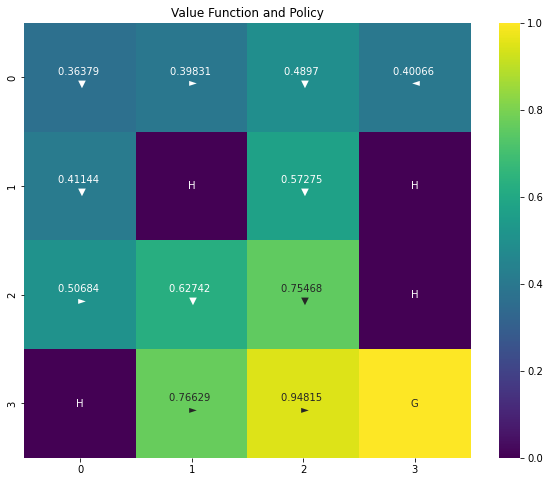

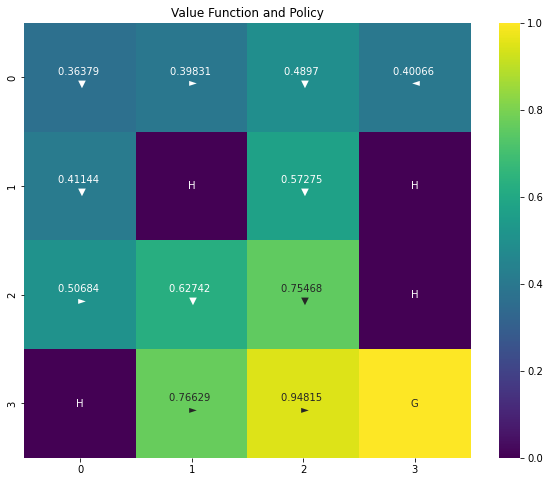

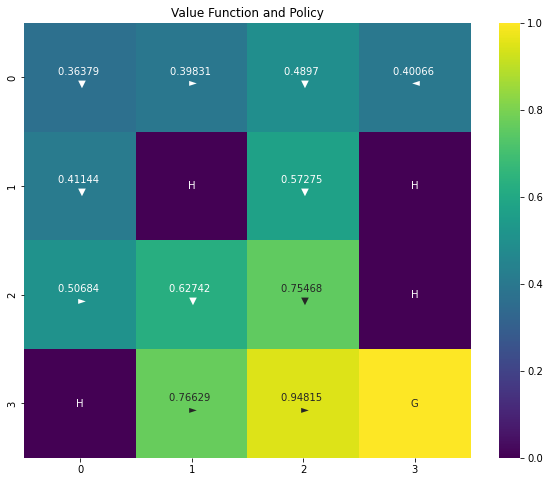

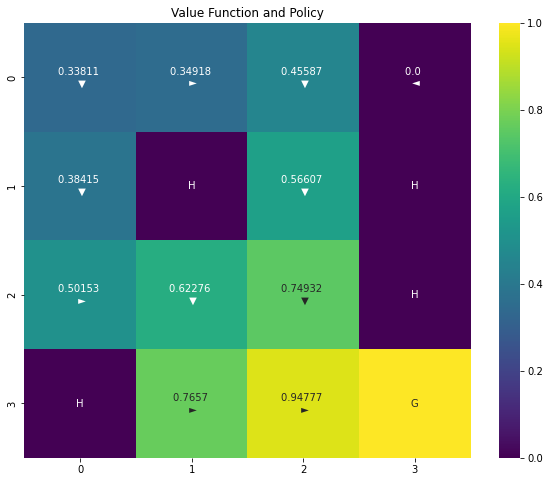

In [5]:
experiments('small_map.csv',prefix = 'small',show_values=True)

Policy Iteration
0.0
Time elapsed: 4.5500123500823975 seconds
Number of iterations:  10
Policy Value:  [3.19317761e-07 3.46440059e-07 3.59668372e-07 ... 8.16424216e-01
 9.51988051e-01 0.00000000e+00]

Plain Value Iteration
Time taken: 19.442344903945923 seconds
Number of iterations:  163
Number of state updates =  407500
Value:  [3.63114825e-07 3.85193454e-07 3.96776611e-07 ... 8.16424216e-01
 9.51988051e-01 0.00000000e+00]
Delta:  9.453970959840766e-11

Prioritized Sweep Value Iteration
Middle Heap Step Done in : 0.34540486335754395 seconds and 4443 state updates
Heap Step Done in : 0.34728288650512695 seconds
Heap update steps = 4443
Value:  [9.43967606e-12 1.19384923e-11 1.41824359e-11 ... 8.14973952e-01
 9.51337484e-01 0.00000000e+00]

Row Major Value Iteration
Time taken: 15.730008125305176 seconds
Number of iterations:  124
Number of state updates =  310000
Value:  [3.62004890e-07 3.84530158e-07 3.96383011e-07 ... 8.16424216e-01
 9.51988051e-01 0.00000000e+00]
Delta:  7.063649402

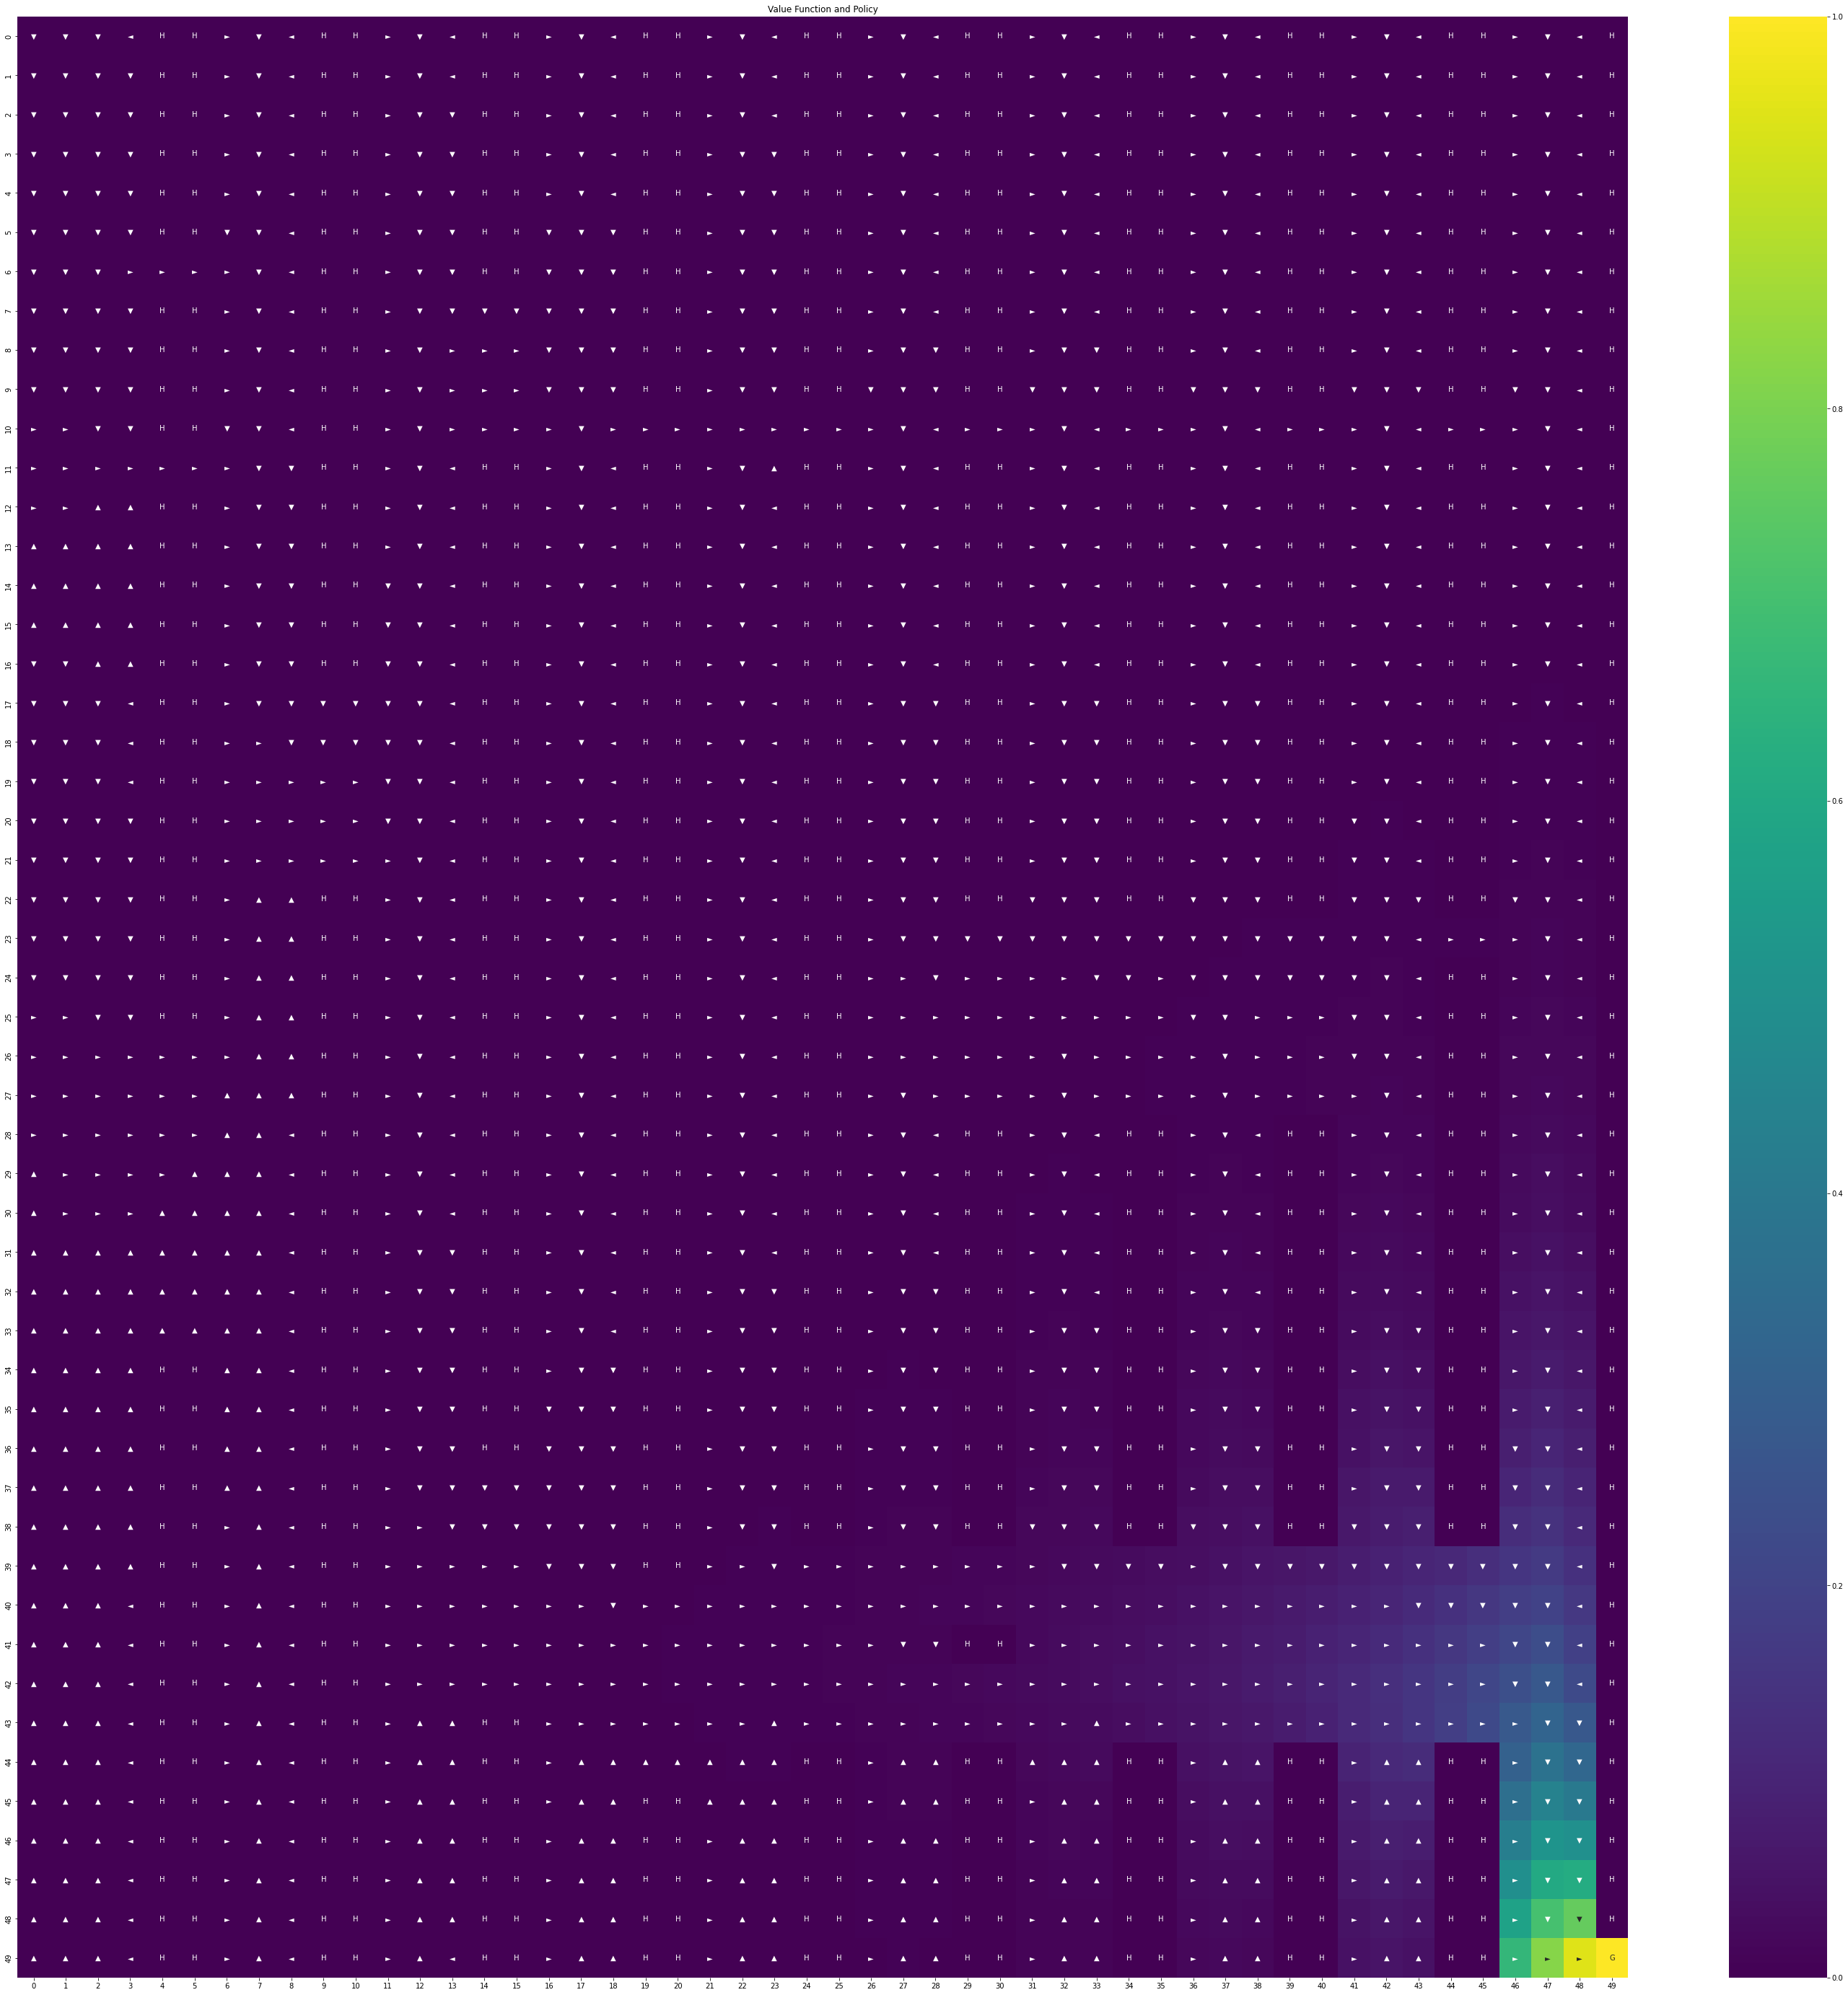

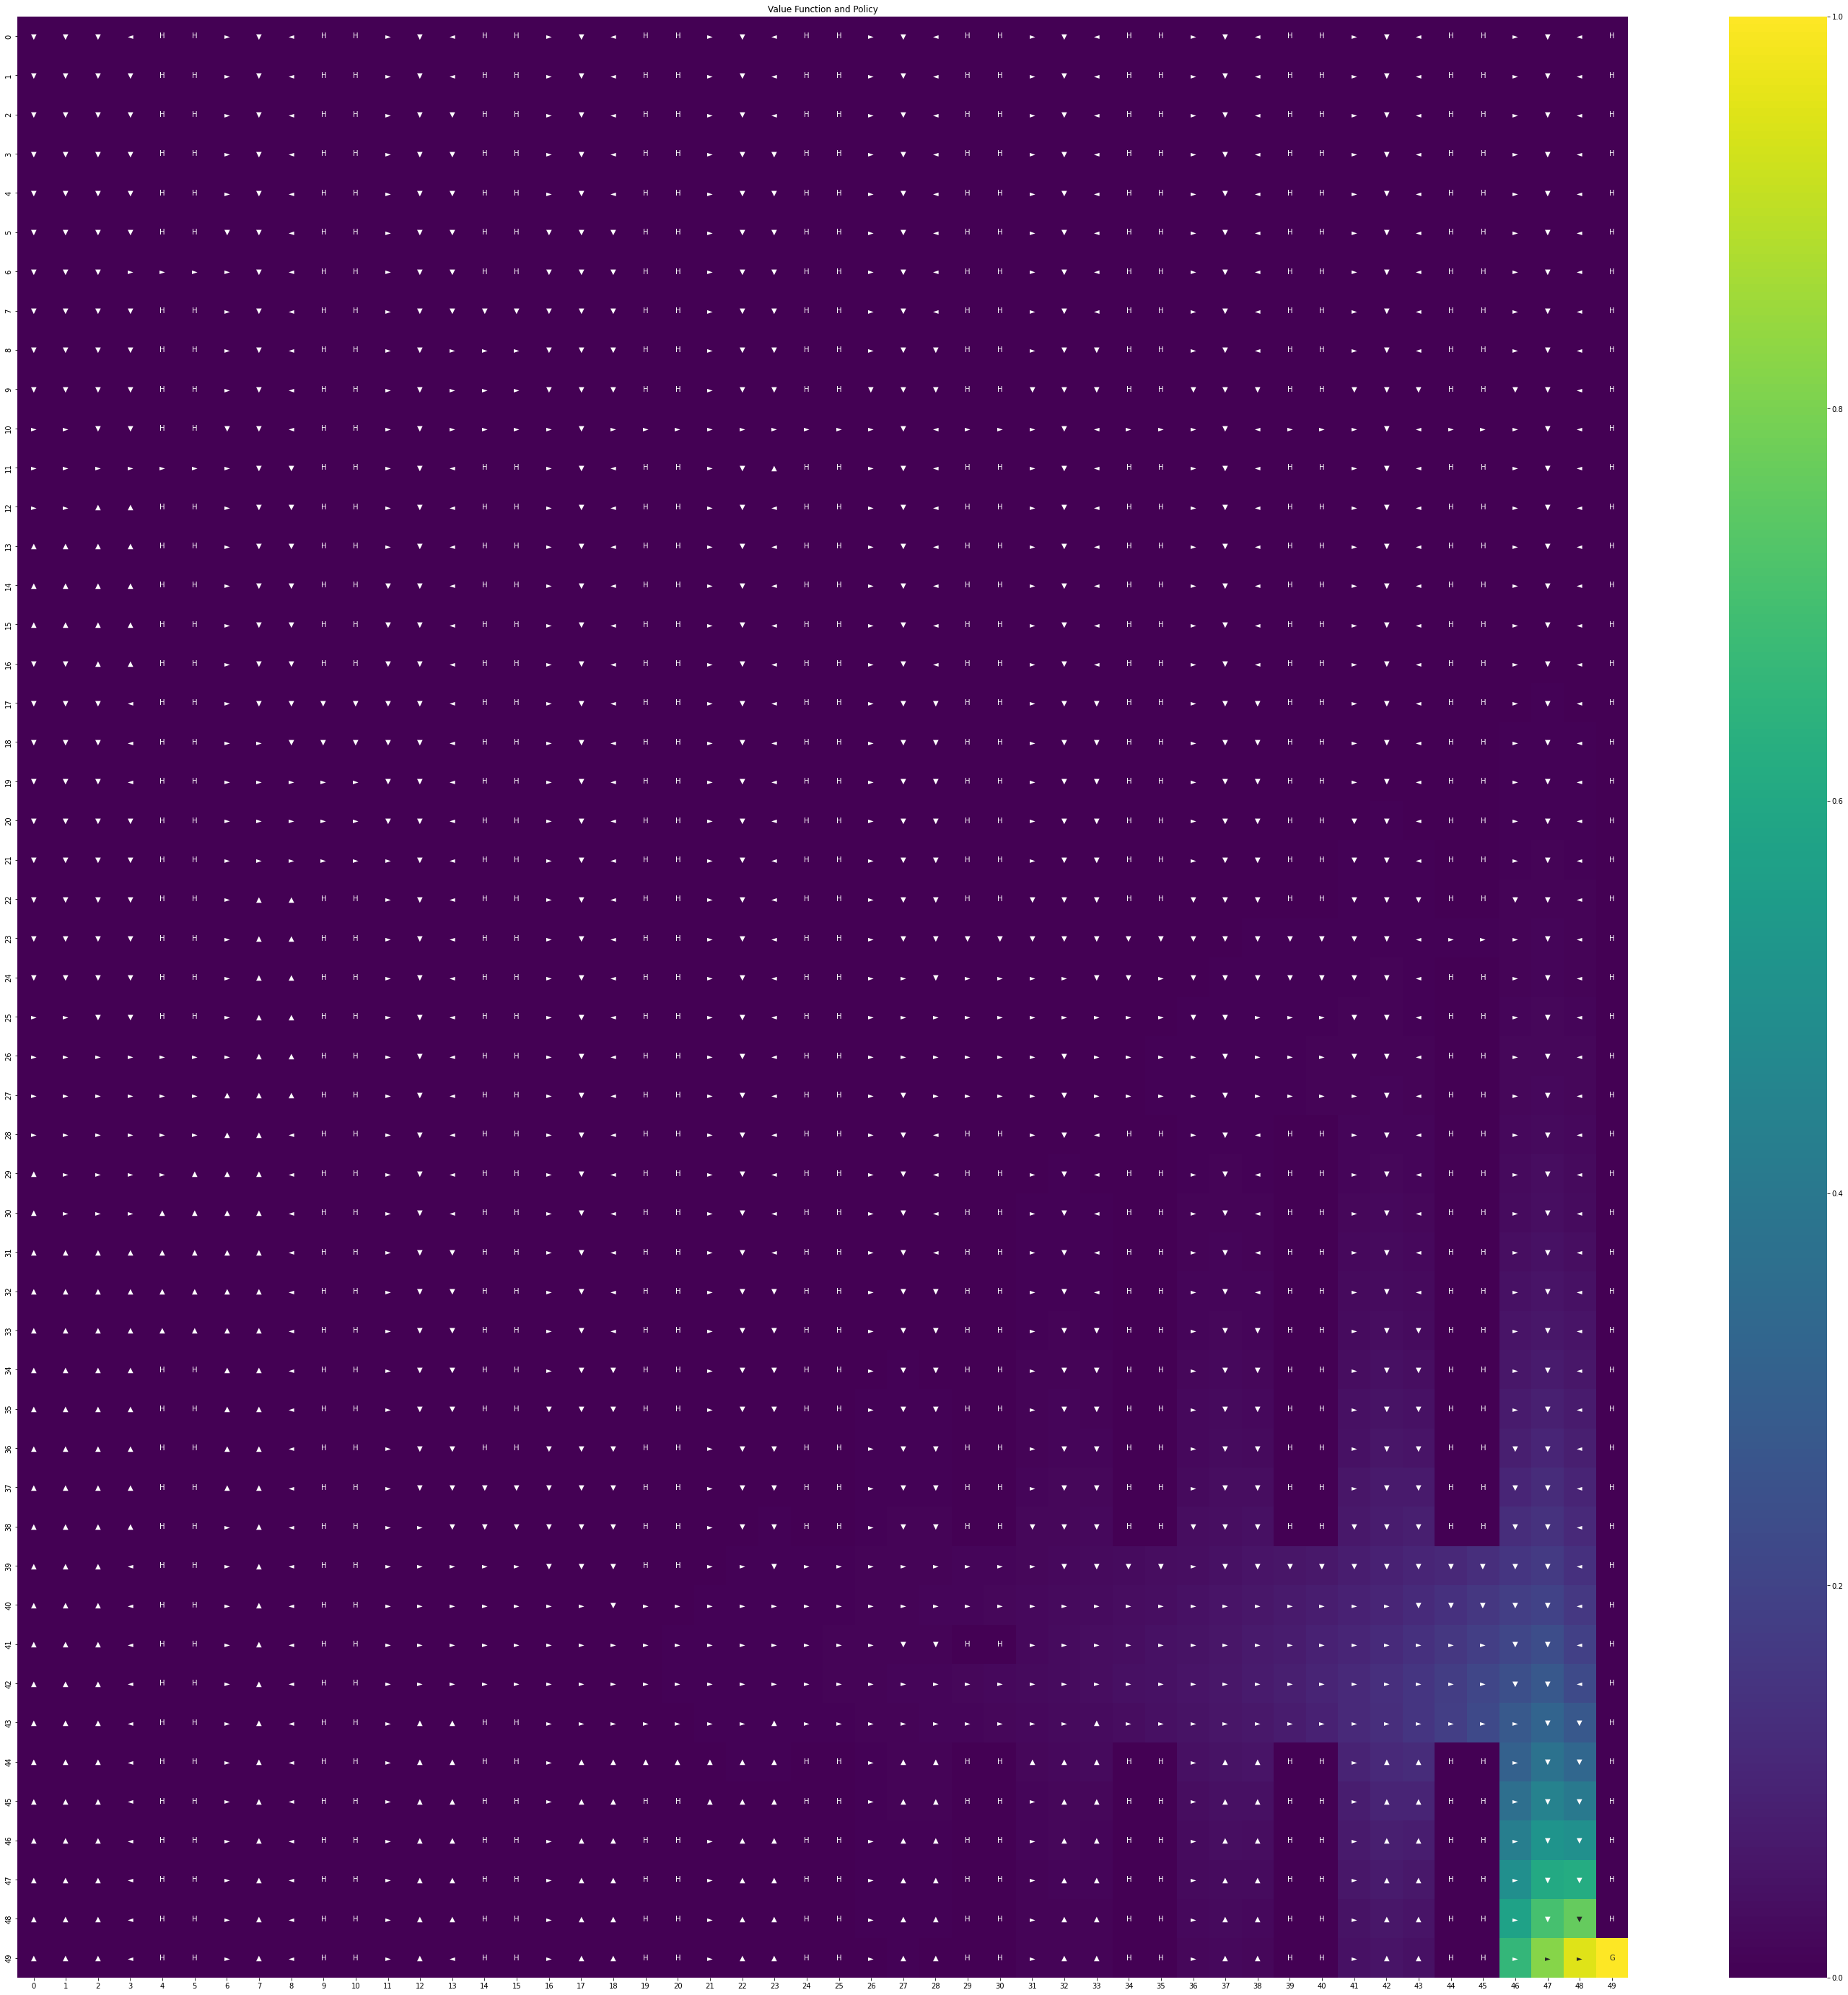

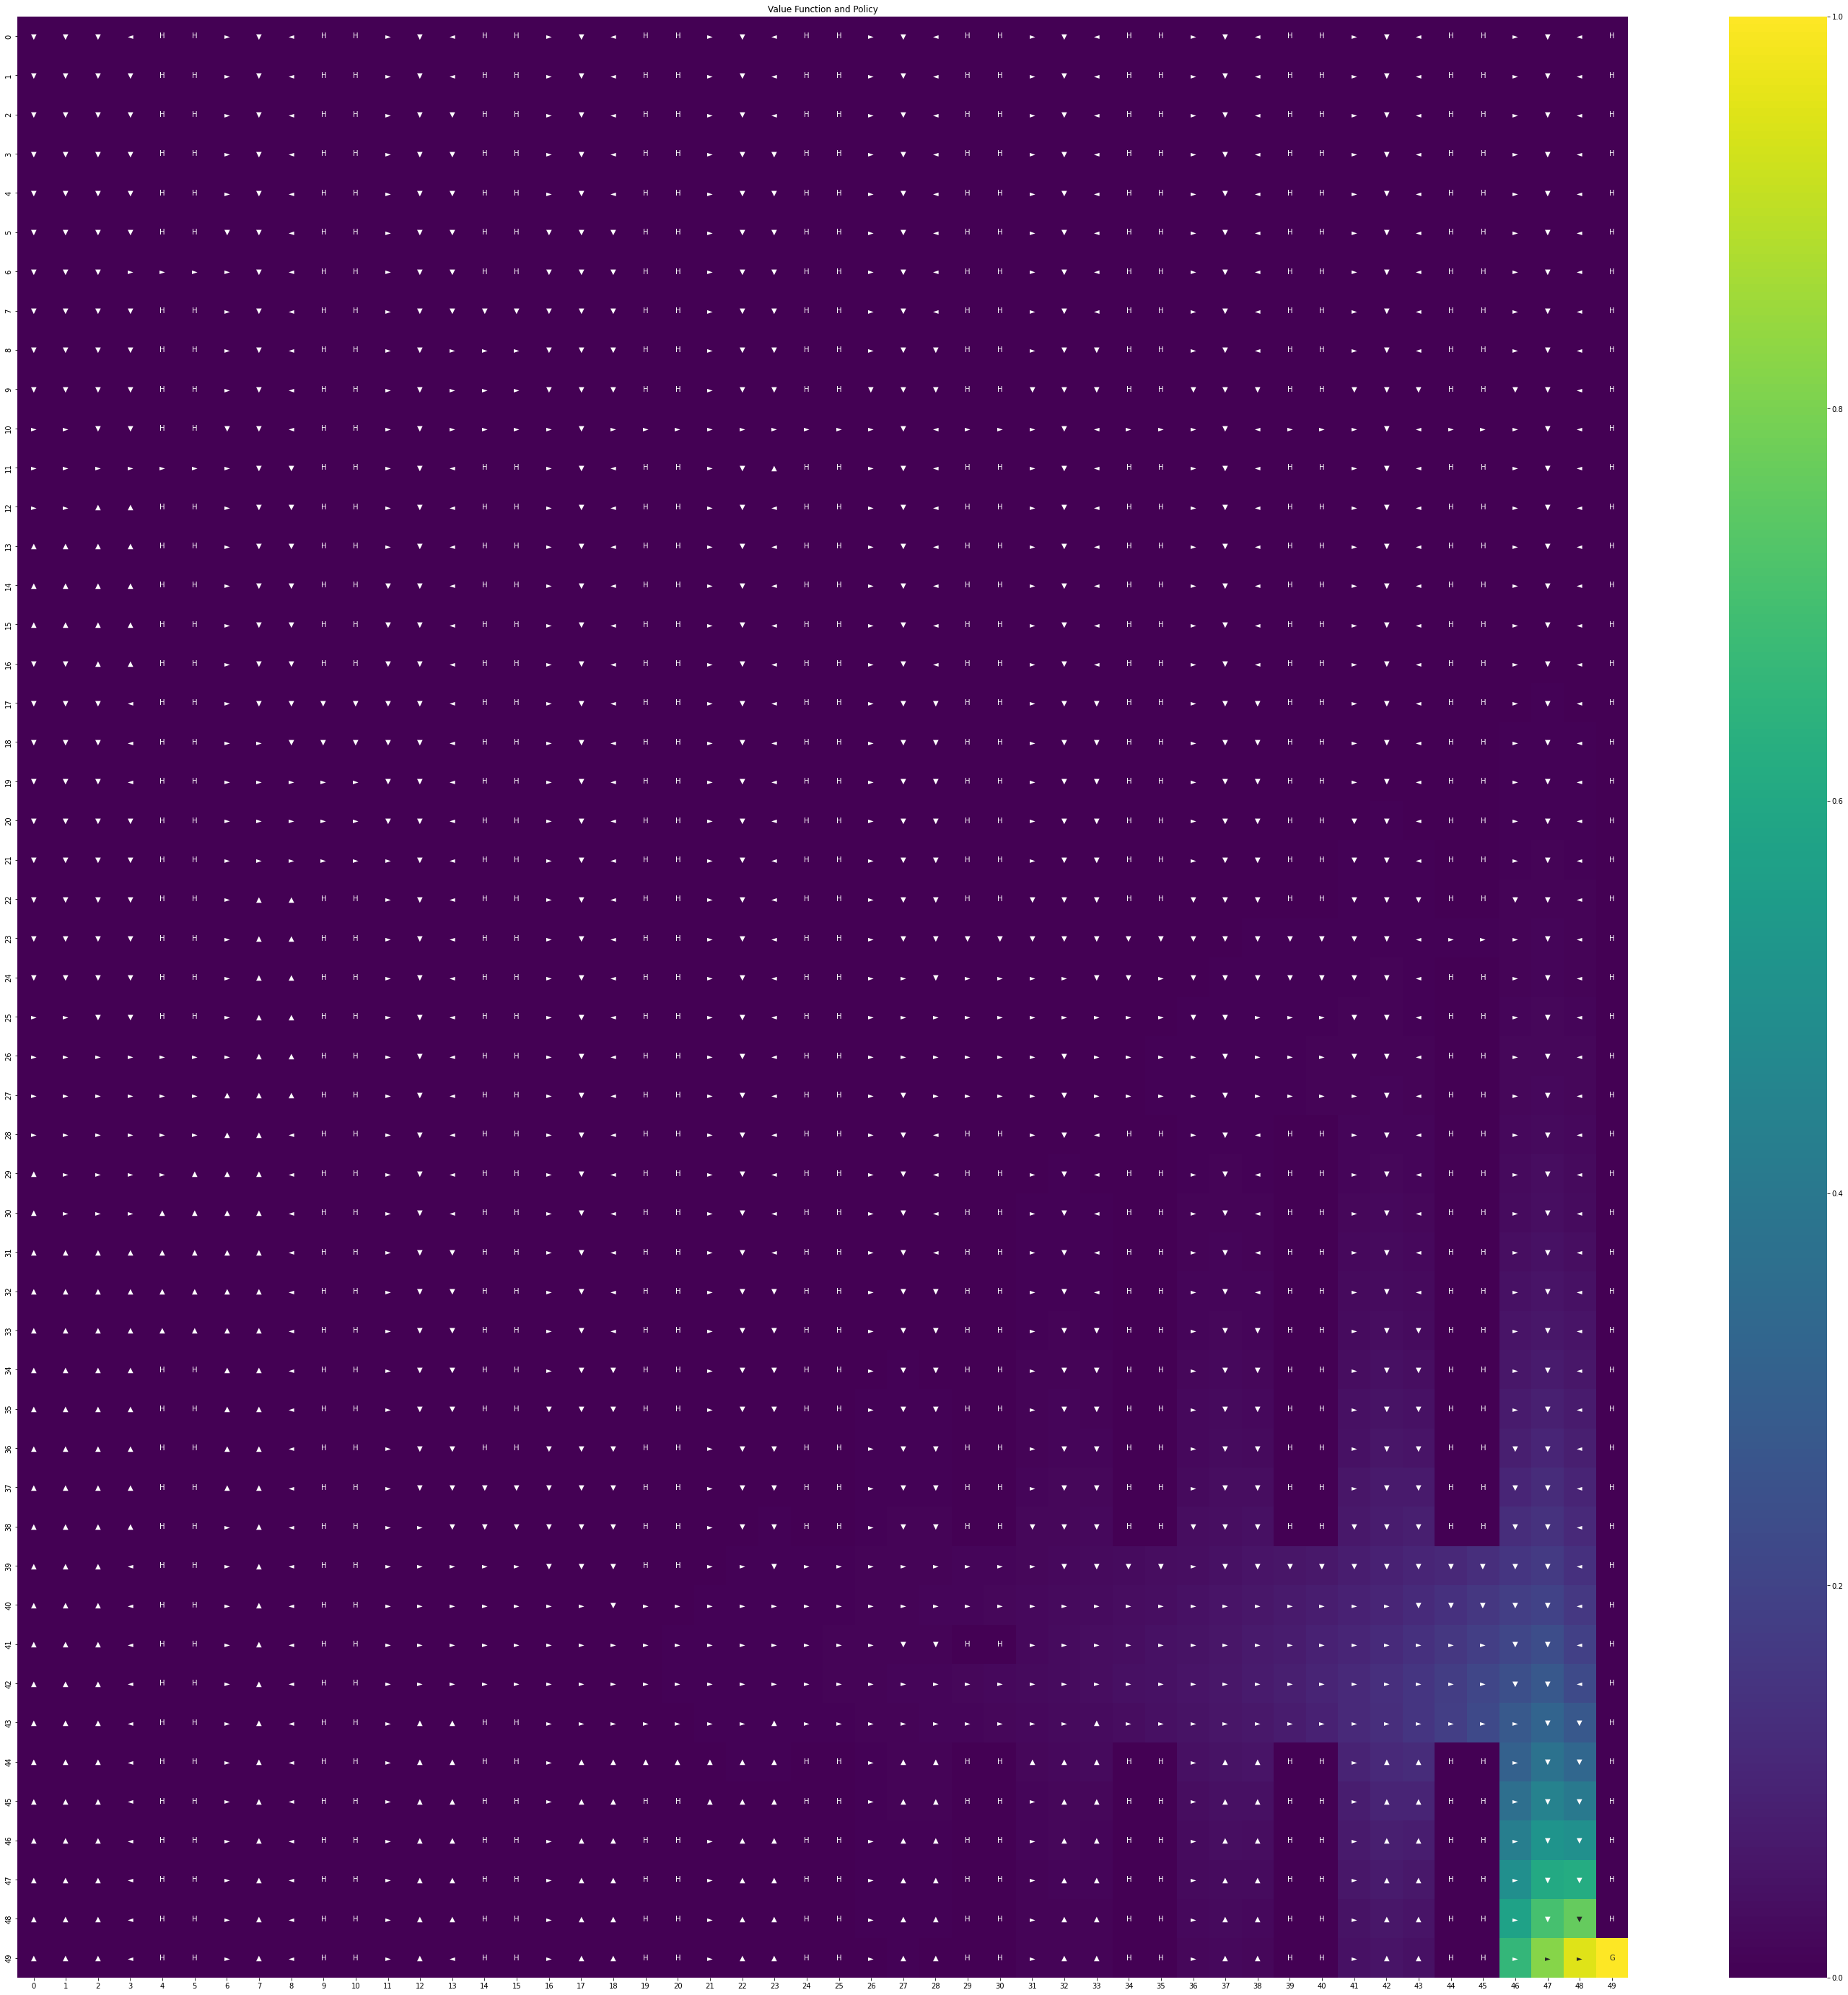

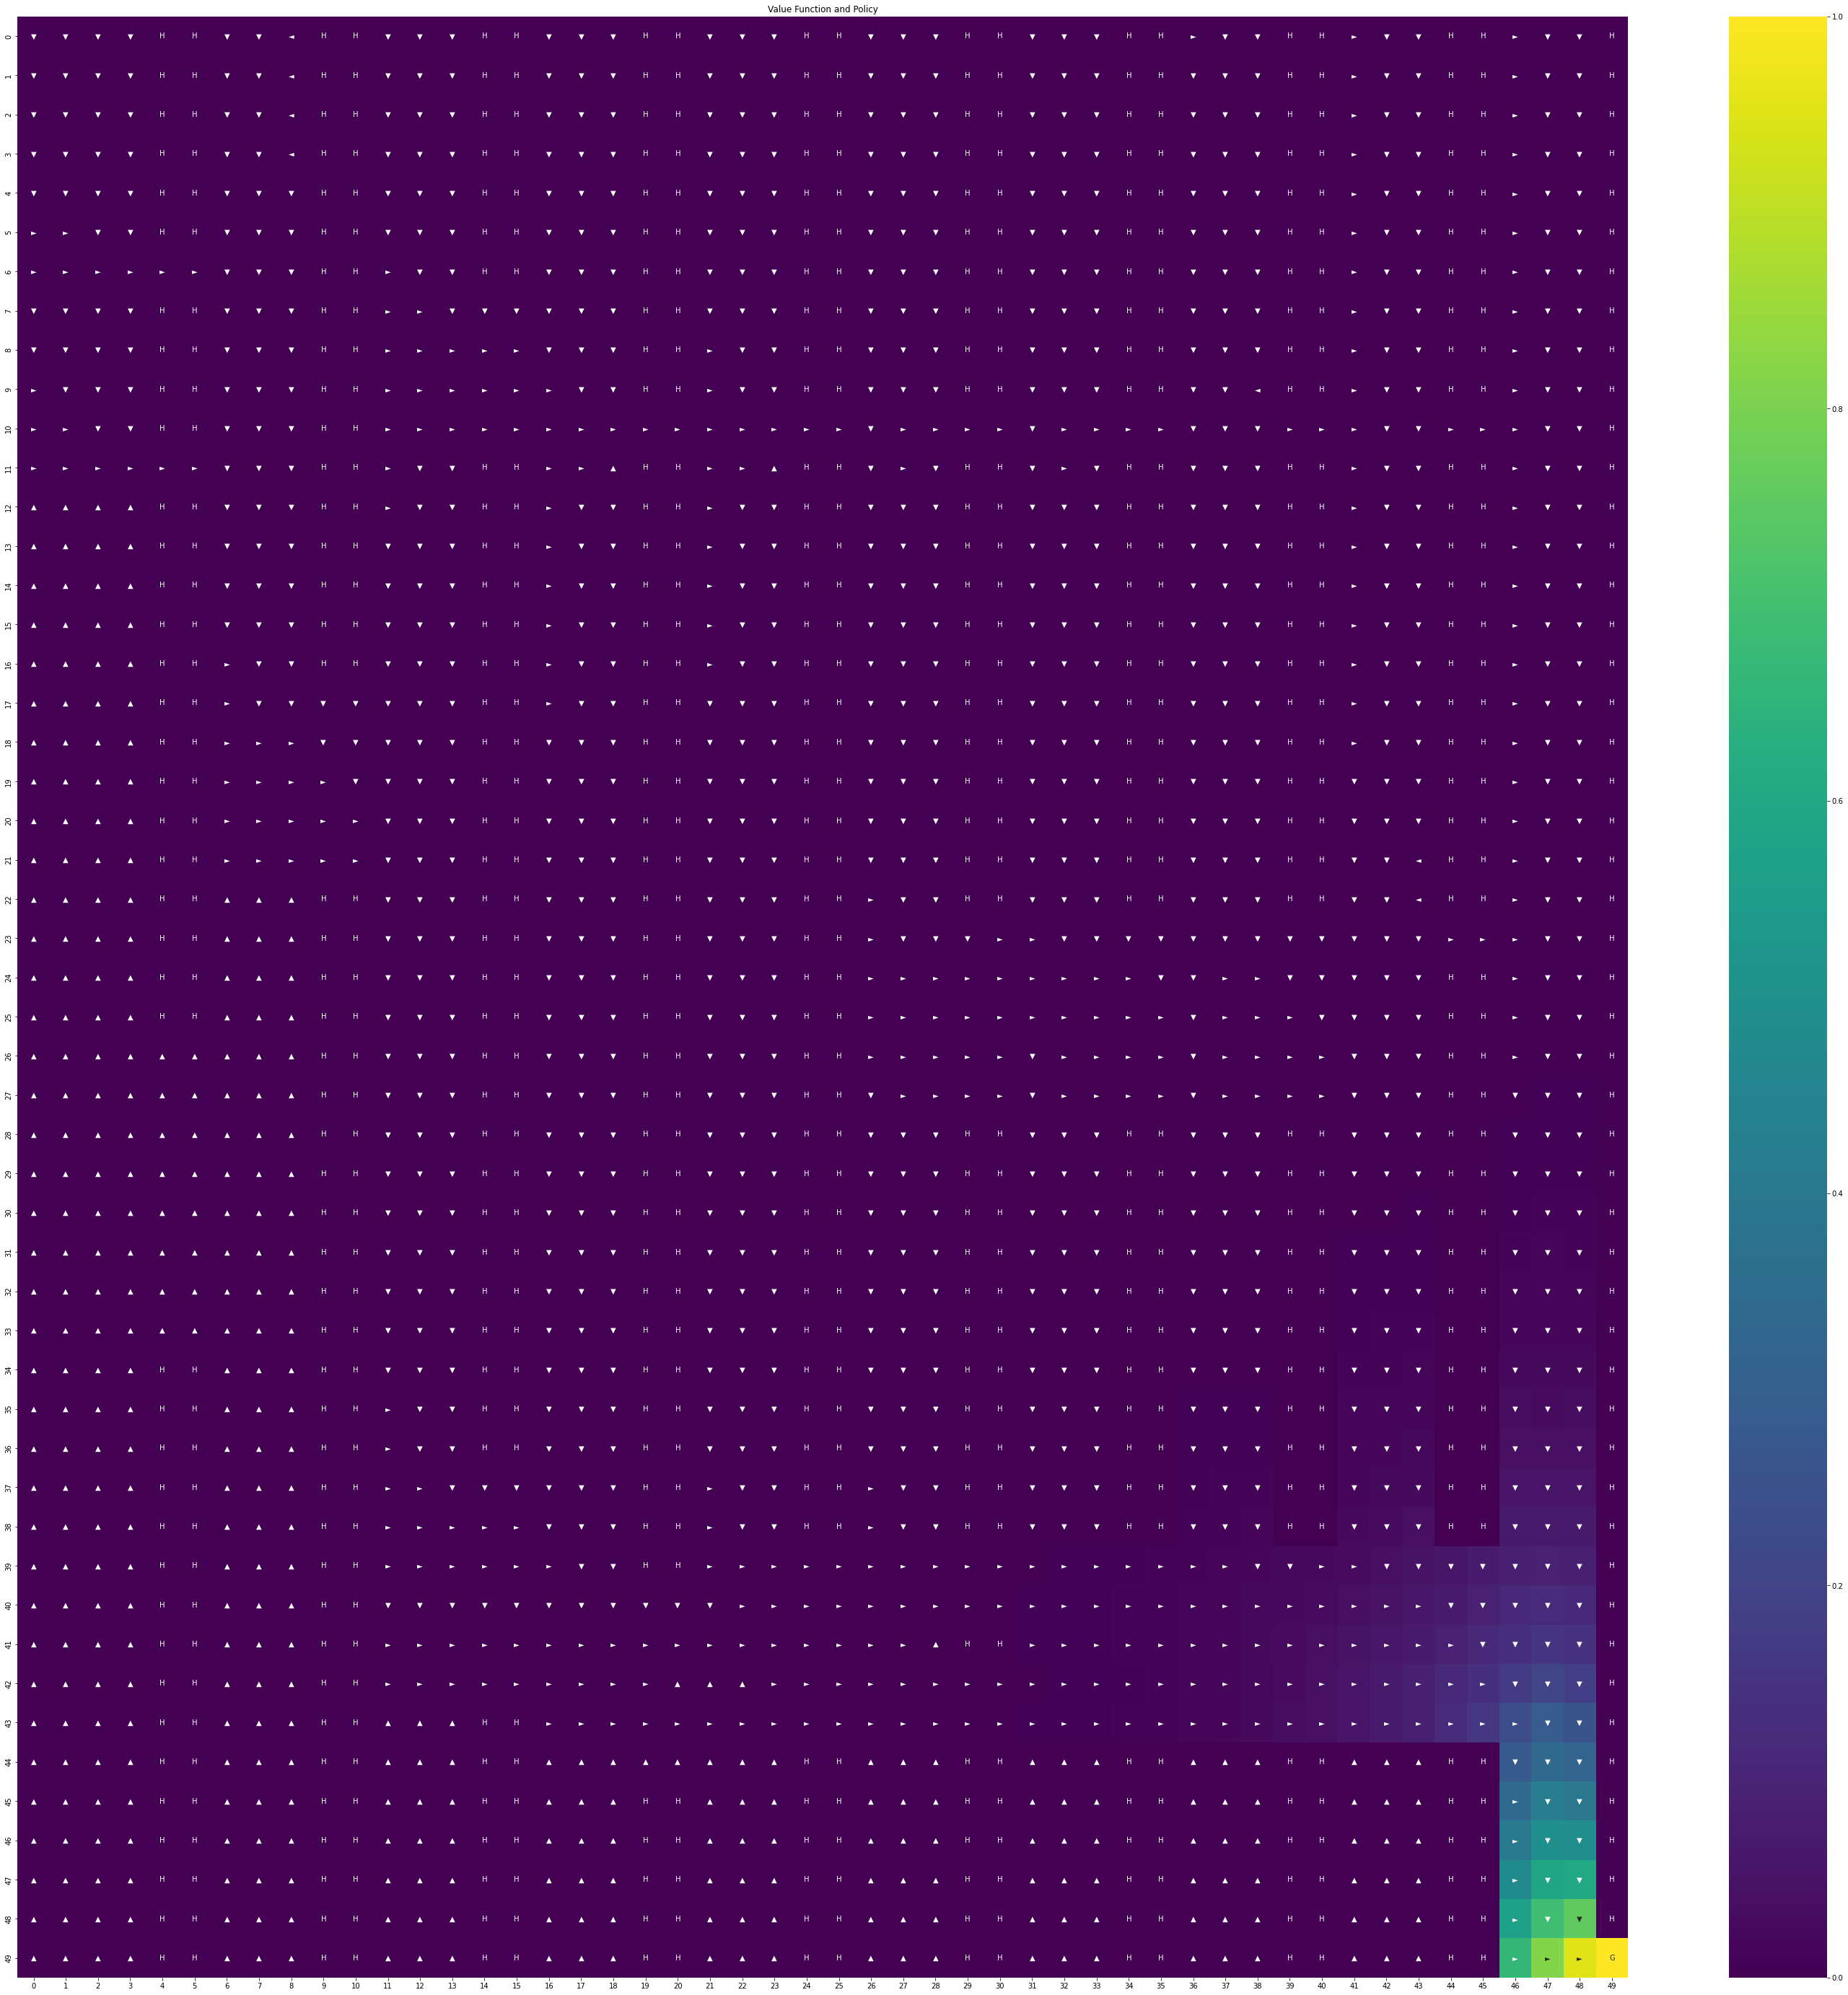

In [9]:
experiments('large_map.csv',prefix = 'large',show_values=False,figsize = (50,50))

# Part-B

In [8]:
living_reward = 0.01
hole_reward = 0
goal_reward = 1
p = 0.8
move_list = [0,1,2,3]
move_move_map = {0:[1,2,3],1:[0,2,3],2:[0,1,3],3:[0,1,2]}
tol = 1e-9
move_map = {0: "\u25B2", 1: "\u25BC", 2: "\u25C4", 3: "\u25BA"}
# 0 - up , 1 - down , 2 - left , 3 - right

In [10]:
small_environment = environment('small_map.csv', move_list, move_move_map, living_reward = living_reward, hole_reward = hole_reward, goal_reward = goal_reward)
small_MDP = MDPSolver(small_environment, 0.999)
VI_pol, VI_val, VI_hist = small_MDP.value_iteration(print_iters = True, tol = tol)

Plain Value Iteration
Time taken: 0.6031322479248047 seconds
Number of iterations:  1000
Number of state updates =  16000
Value:  [0.97630418 0.91071179 0.9078496  0.84781576 0.90640623 0.
 0.79701885 0.         0.84750714 0.86081092 0.91077253 0.
 0.         0.91888909 0.98977444 0.        ]
Delta:  3.919819935305213e-08


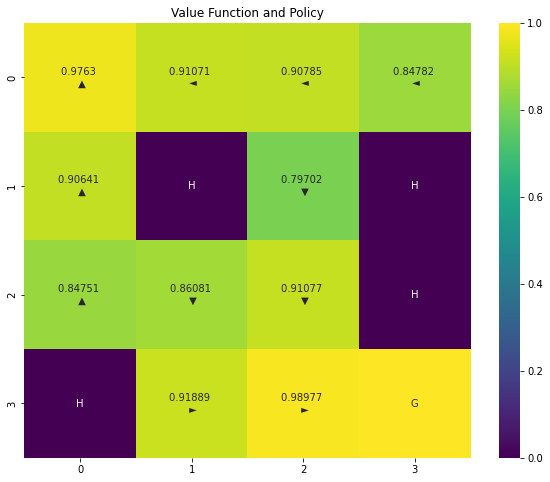

In [11]:
small_environment.plot(VI_pol,VI_val,move_map,cmap = 'viridis',show_values = True, show_policy = True, save_path = f'plots/partb1_electric_2.png', figsize=None)

In [18]:
living_reward = 0
hole_reward = 0
goal_reward = 1
p = 1/3
move_list = [0,1,2,3]
move_move_map = {0:[2,3],1:[2,3],2:[0,3],3:[0,1]}
tols = [1e-9]
move_map = {0: "\u25B2", 1: "\u25BC", 2: "\u25C4", 3: "\u25BA"}
# 0 - up , 1 - down , 2 - left , 3 - right
for tol in tols:
    print()
    print(tol)
    small_environment = environment('small_map.csv', move_list,move_move_map=move_move_map ,p = p,living_reward = living_reward, hole_reward = hole_reward, goal_reward = goal_reward)
    small_MDP = MDPSolver(small_environment, 0.9)
    VI_pol, VI_val, VI_hist = small_MDP.policy_iteration(print_iters = True, tol = tol)


1e-09
Policy Iteration
6.938893903907228e-18
Time elapsed: 0.011553049087524414 seconds
Number of iterations:  4
Policy Value:  [0.03969672 0.04271276 0.05996653 0.04497474 0.049913   0.
 0.09494731 0.         0.11646366 0.22183556 0.25652457 0.
 0.         0.36646366 0.63324633 0.        ]


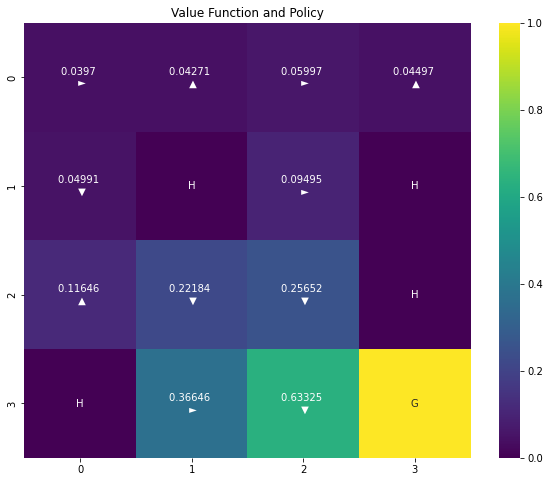

In [19]:
small_environment.plot(VI_pol,VI_val,move_map,cmap = 'viridis',show_values = True, show_policy = True, save_path = f'plots/partb1_p3_PI.png', figsize=None)

In [2]:
import torch
torch.backends.mps.is_available()

False

In [3]:
import transformers

In [4]:
bert_large = transformers.BertModel.from_pretrained('bert-large-uncased')

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

KeyboardInterrupt: 